In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# Load spaCy's medium English model which includes word vectors
nlp = spacy.load("en_core_web_md")

In [3]:
# 1. Create a sample list of 100 common words
words = [
    "apple", "banana", "orange", "fruit", "cat", "dog", "lion", "tiger", "elephant", "giraffe",
    "computer", "keyboard", "mouse", "screen", "internet", "python", "java", "c++", "programming", "code",
    "algorithm", "data", "science", "machine", "learning", "artificial", "intelligence", "robot", "car", "bicycle",
    "train", "airplane", "boat", "music", "guitar", "piano", "drum", "violin", "singer", "song",
    "dance", "party", "holiday", "travel", "city", "village", "mountain", "river", "ocean", "forest",
    "tree", "flower", "garden", "book", "novel", "story", "poem", "literature", "movie", "film",
    "actor", "director", "theater", "stage", "painting", "sculpture", "art", "museum", "history", "culture",
    "research", "university", "school", "education", "teacher", "student", "office", "business", "market", "economy",
    "finance", "money", "bank", "investment", "health", "doctor", "hospital", "medicine", "disease", "cure",
    "technology", "innovation", "energy", "power", "environment", "nature", "climate", "weather", "season", "spring",
    "summer", "autumn", "winter", "time"
]
# Use exactly the first 100 words (if the list is longer)
words = words[:100]

In [4]:
# 2. Obtain embeddings for each word using spaCy.
# spaCy's "en_core_web_md" provides 300-dimensional vectors.
embeddings = []
for word in words:
    token = nlp(word)
    embeddings.append(token.vector)
embeddings = np.array(embeddings)

In [5]:

# 3. Reduce the 300-d embeddings to 2-d using PCA for visualization.
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

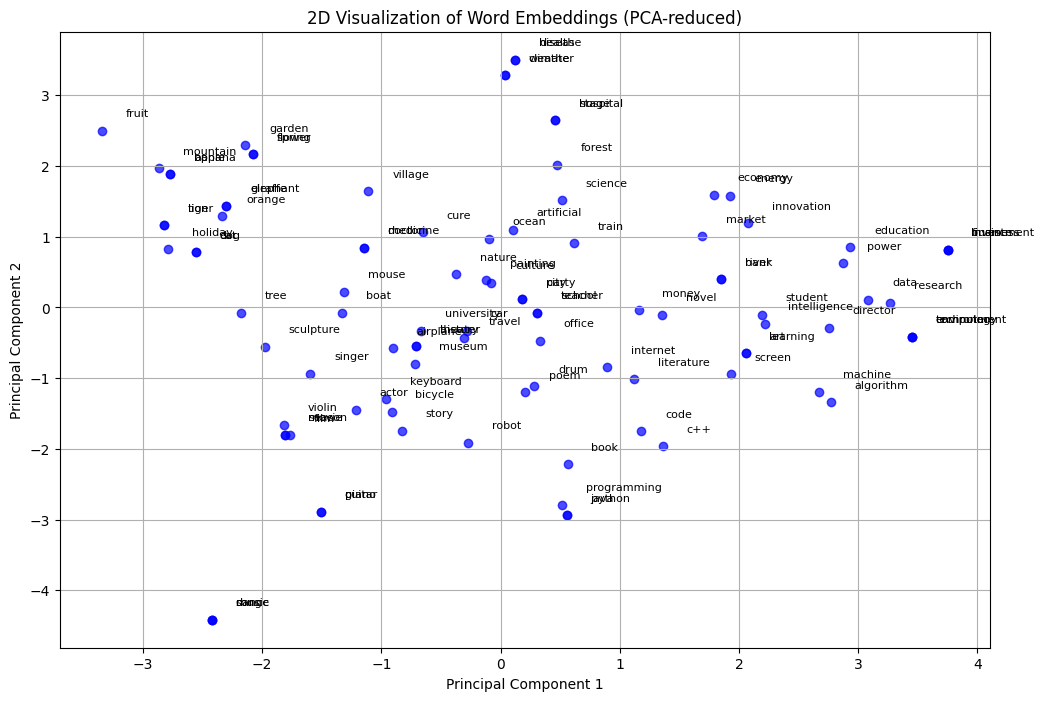

In [6]:
# 4. Plot the 2D embeddings.
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='blue', alpha=0.7)
for i, word in enumerate(words):
    plt.text(embeddings_2d[i, 0] + 0.2, embeddings_2d[i, 1] + 0.2, word, fontsize=8)
plt.title("2D Visualization of Word Embeddings (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [7]:
# 5. Compute pairwise cosine similarity using the original 300-d embeddings.
sim_matrix = cosine_similarity(embeddings)

In [8]:

# Helper function to retrieve the top N similar words for a given target word.
def get_top_similar(target_word, words, sim_matrix, top_n=5):
    try:
        target_idx = words.index(target_word)
    except ValueError:
        print(f"Word '{target_word}' not found in list.")
        return []

    # Copy the similarity scores and ignore the word itself by setting its similarity to -inf.
    sims = sim_matrix[target_idx].copy()
    sims[target_idx] = -np.inf
    top_indices = np.argsort(sims)[-top_n:][::-1]
    return [(words[i], sims[i]) for i in top_indices]


In [9]:
# Example: Retrieve and print the top 5 words similar to "computer"
target_word = "computer"
similar_words = get_top_similar(target_word, words, sim_matrix, top_n=5)

print(f"Top 5 words similar to '{target_word}':")
for word, sim in similar_words:
    print(f"{word}: similarity = {sim:.4f}")

Top 5 words similar to 'computer':
environment: similarity = 1.0000
technology: similarity = 1.0000
machine: similarity = 0.5523
power: similarity = 0.5283
learning: similarity = 0.4744
